In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import initializers

def build_simple_dense_model(var, units, layers, activation, distribution, seed=None):
    initialisation = initializers.VarianceScaling(scale=var, distribution=distribution, seed=seed)
    inputs = Input(shape=(4,))
    x = Dense(units, activation=activation, kernel_initializer=initialisation)(inputs)
    for i in range(layers-2):
        x = Dense(units, activation=activation, kernel_initializer=initialisation)(x)
    output = Dense(3, activation='linear', kernel_initializer=initialisation)(x)
    model = Model(inputs=inputs, outputs=output)
    return model

model = build_simple_dense_model(10.0, 8, 16, 'softmax', 'normal')
model.compile(optimizer='sgd', loss='mse')

Using TensorFlow backend.
/usr/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
import numpy as np
def identity(x):
    return x
def radius(x,y):
    return np.sqrt(x**2 + y**2)
def build_grid(x_size, y_size, alpha = 1.0, scale=1.0, f1=identity, f2=identity, f3=radius):
    X, Y = np.meshgrid(np.linspace(-scale,scale,x_size), np.linspace(-scale,scale,y_size), indexing='ij')
    V = [[f1(x), f2(y), f3(x,y), alpha] for x,y in zip(np.ravel(X),np.ravel(Y))]
    return V


<IPython.core.display.Javascript object>


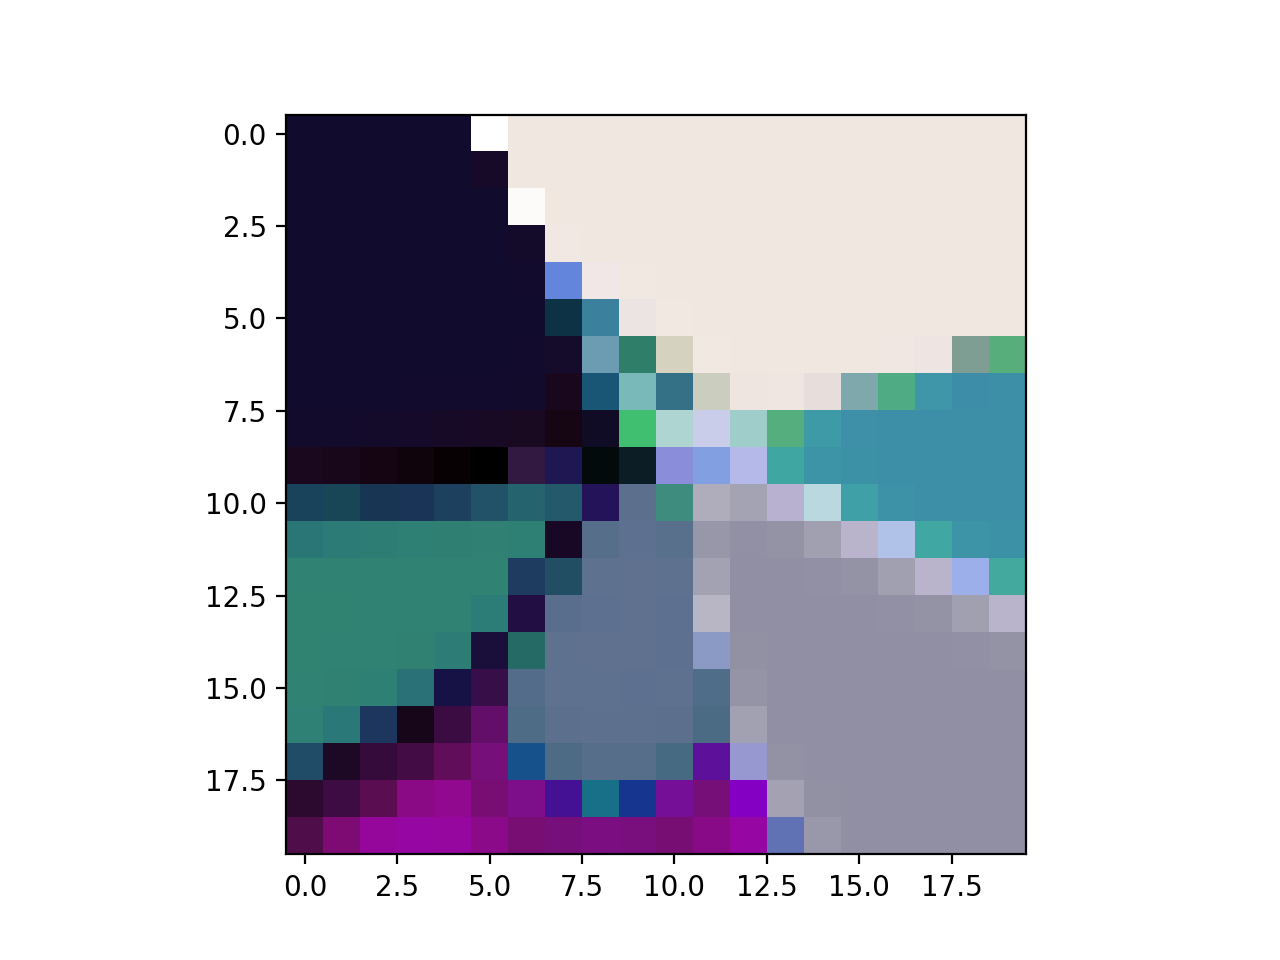

<IPython.core.display.Javascript object>


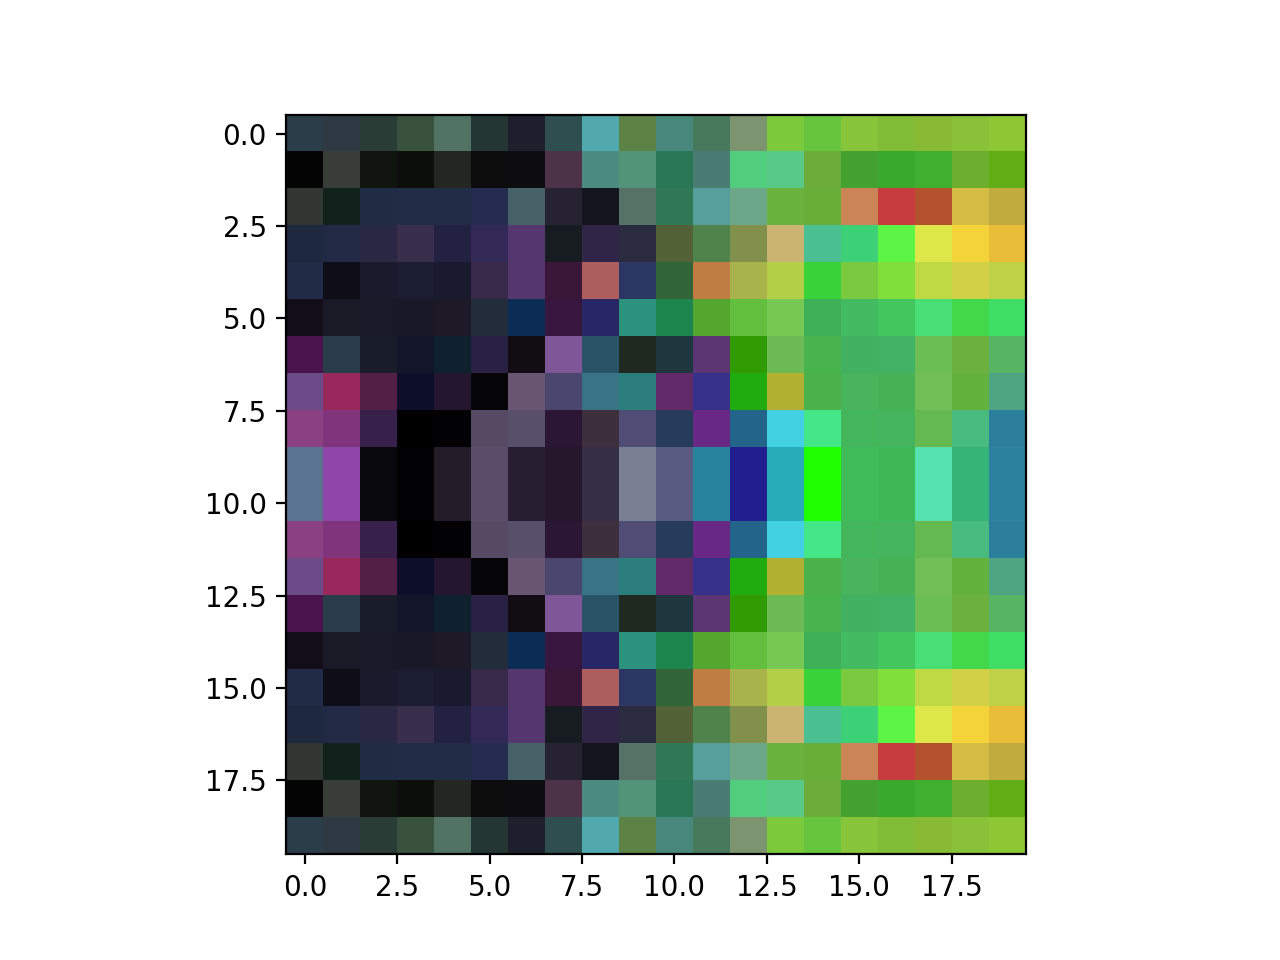

<IPython.core.display.Javascript object>


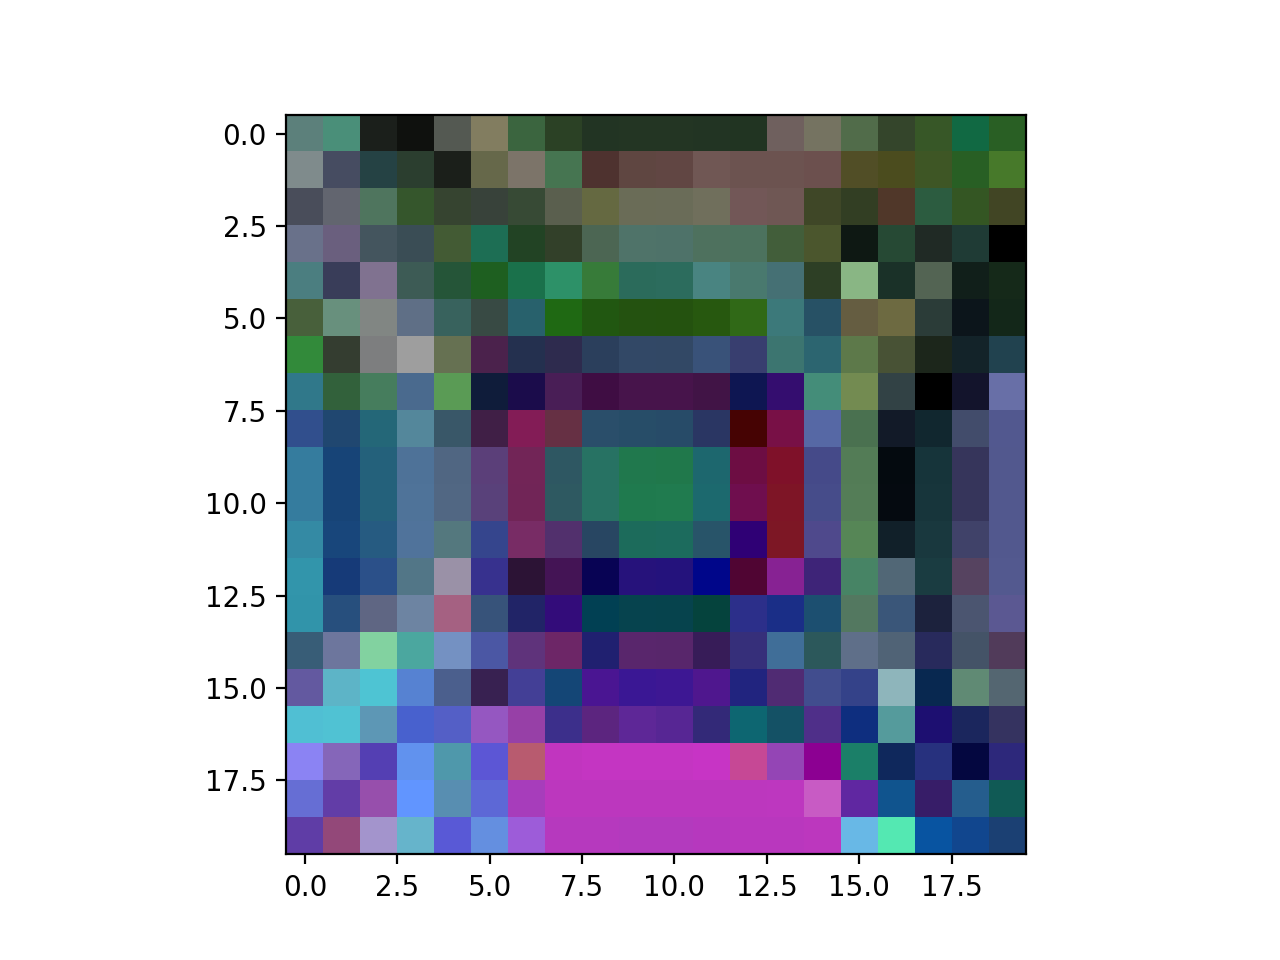

<IPython.core.display.Javascript object>


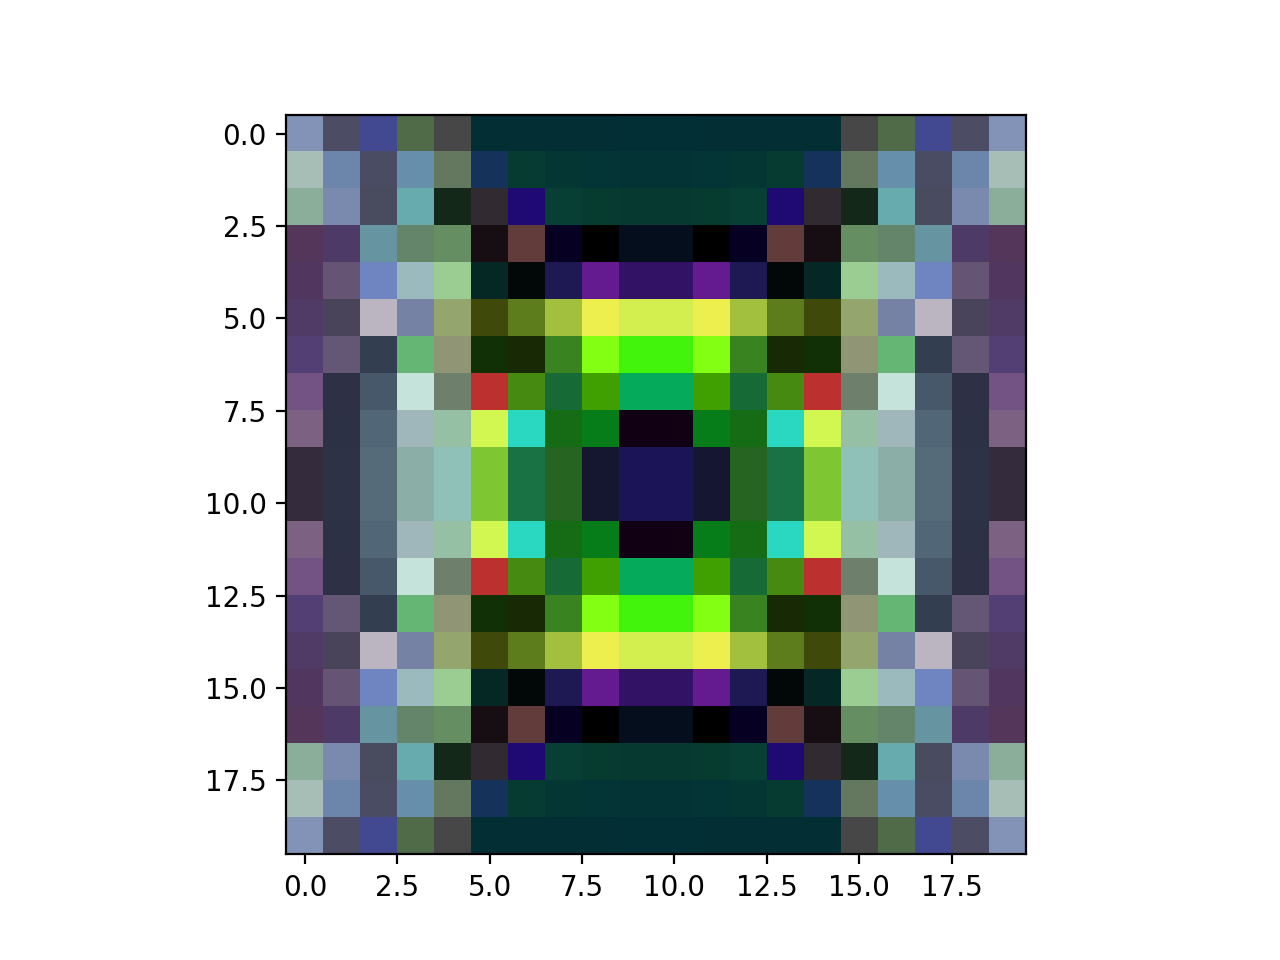

In [5]:
%matplotlib notebook
from skimage.color import hsv2rgb
from matplotlib import pyplot as plt
import cv2
def render_abstract(model, vector_shape = (20,20), scale=2.0, alpha = 0.50, grid_functs = [identity, identity, radius]):
    V = build_grid(vector_shape[0], vector_shape[1], scale=scale, alpha=alpha,
                          f1=grid_functs[0],
                          f2=grid_functs[1],
                          f3=grid_functs[2])
  
    pred = model.predict(V)
    img = []
    for i in range(pred.shape[1]):
        yp = pred[:, i]
        yp = (yp - yp.min()) / (yp.max()-yp.min())
        img.append(yp.reshape(vector_shape))
    img = np.dstack(img)

    return hsv2rgb(((255.0*img)).astype(np.uint8))
#32 unit per layer, 3 layers, X,Y,Radius
model = build_simple_dense_model(906.50, 32, 5, 'softmax', 'normal')
model.compile(optimizer='adam', loss='mse')
img = render_abstract(model)
plt.imshow(img)
cv2.imwrite("1.png",255*img)

plt.figure()
#64 unit per layer, 4 layers, cosX,sinY,Radius
model = build_simple_dense_model(306.50, 64, 4, 'tanh', 'normal')
model.compile(optimizer='adam', loss='mse')
img = render_abstract(model, grid_functs=[np.cos,np.sin,radius])
plt.imshow(img)
cv2.imwrite("2.png",255*img)
plt.figure()
#16 unit per layer, 5 layers, X^3,Y^3,Radius
model = build_simple_dense_model(306.50, 64, 4, 'tanh', 'normal')
model.compile(optimizer='adam', loss='mse')
img = render_abstract(model, grid_functs=[lambda x : x**3,lambda x : x**3,radius])
plt.imshow(img)
cv2.imwrite("3.png",255*img)
plt.figure()
#16 unit per layer, 4 layers, X^4,Y^4,Radius, softmax
model = build_simple_dense_model(406.50, 64, 4, 'tanh', 'normal')
model.compile(optimizer='adam', loss='mse')
img = render_abstract(model, grid_functs=[lambda x : x**2,lambda x : x**4,radius])
plt.imshow(img)
cv2.imwrite("4.png",255*img)
plt.show()

In [14]:
#Animation
model = build_simple_dense_model(906.50, 32, 5, 'tanh', 'normal')
model.compile(optimizer='adam', loss='mse')
for i in range(240):
    alphas = np.linspace(0.0,4.0,240)
    print alphas[i]
    img = render_abstract(model, (800,800),alpha = alphas[i],grid_functs=[lambda x : x**2,lambda x : x**2,lambda x, y : x**2-y**2])

    cv2.imwrite("seq/"+str(i)+".png",255*img)



0.0
0.016736401673640166
0.03347280334728033
0.050209205020920494
0.06694560669456066
0.08368200836820083
0.10041841004184099
0.11715481171548116
0.13389121338912133
0.15062761506276148
0.16736401673640167
0.18410041841004182
0.20083682008368198
0.21757322175732216
0.23430962343096232
0.2510460251046025
0.26778242677824265
0.2845188284518828
0.30125523012552297
0.3179916317991632
0.33472803347280333
0.3514644351464435
0.36820083682008364
0.3849372384937238
0.40167364016736395
0.41841004184100417
0.4351464435146443
0.4518828451882845
0.46861924686192463
0.4853556485355648
0.502092050209205
0.5188284518828451
0.5355648535564853
0.5523012552301255
0.5690376569037656
0.5857740585774058
0.6025104602510459
0.6192468619246861
0.6359832635983264
0.6527196652719665
0.6694560669456067
0.6861924686192468
0.702928870292887
0.7196652719665272
0.7364016736401673
0.7531380753138075
0.7698744769874476
0.7866108786610878
0.8033472803347279
0.8200836820083681
0.8368200836820083
0.8535564853556484
0.8702

In [ ]:
keras.layers.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)

In [127]:
V = np.array(build_grid(10,10))
print np.split(V,10)

[array([[-1.        , -1.        ,  1.41421356,  1.        ],
       [-1.        , -0.77777778,  1.26686158,  1.        ],
       [-1.        , -0.55555556,  1.1439589 ,  1.        ],
       [-1.        , -0.33333333,  1.05409255,  1.        ],
       [-1.        , -0.11111111,  1.0061539 ,  1.        ],
       [-1.        ,  0.11111111,  1.0061539 ,  1.        ],
       [-1.        ,  0.33333333,  1.05409255,  1.        ],
       [-1.        ,  0.55555556,  1.1439589 ,  1.        ],
       [-1.        ,  0.77777778,  1.26686158,  1.        ],
       [-1.        ,  1.        ,  1.41421356,  1.        ]]), array([[-0.77777778, -1.        ,  1.26686158,  1.        ],
       [-0.77777778, -0.77777778,  1.09994388,  1.        ],
       [-0.77777778, -0.55555556,  0.95581392,  1.        ],
       [-0.77777778, -0.33333333,  0.84619701,  1.        ],
       [-0.77777778, -0.11111111,  0.7856742 ,  1.        ],
       [-0.77777778,  0.11111111,  0.7856742 ,  1.        ],
       [-0.77777778, 

In [ ]:
from keras.layers import SimpleRNN
def build_simple_RNN_model(var, units, layers, activation, distribution, seed=None):
    initialisation = initializers.VarianceScaling(scale=var, distribution=distribution, seed=seed)
    inputs = Input(shape=(64, 4,))
    x = SimpleRNN(units, activation=activation, kernel_initializer=initialisation, recurrent_initializer=initialisation, bias_initializer='zeros')(inputs)
    for i in range(layers-2):
        x = SimpleRNN(units, activation=activation, kernel_initializer=initialisation, recurrent_initializer=initialisation, bias_initializer='zeros')(x)
    output = Dense(3, activation='linear', kernel_initializer=initialisation)(x)
    model = Model(inputs=inputs, outputs=output)
    return model

def render_abstract(model, vector_shape = (2000,2000), scale=2.0, alpha = 0.50, grid_functs = [identity, identity, radius]):
    V = np.array(build_grid(vector_shape[0], vector_shape[1], scale=scale, alpha=alpha,
                          f1=grid_functs[0],
                          f2=grid_functs[1],
                          f3=grid_functs[2]))
    V = np.array(np.split(V,vector_shape[0]*vector_shape[1]//64))
    print V.shape
    pred = model.predict(V)
    img = []
    for i in range(pred.shape[1]):
        yp = pred[:, i]
        yp = (yp - yp.min()) / (yp.max()-yp.min())
        img.append(yp.reshape(vector_shape))
    img = np.dstack(img)

    return hsv2rgb(((255.0*img)).astype(np.uint8))

model = build_simple_RNN_model(906.50, 32, 2, 'tanh', 'normal')
model.compile(optimizer='adam', loss='mse')
img = render_abstract(model,(128,128))
plt.imshow(img)
cv2.imwrite("rnn_1.png",255*img)


In [17]:
def build_3D_grid(x_size, y_size, z_size, alpha = 1.0, scale=1.0, f1=identity, f2=identity, f3=identity, f4=radius):
    X, Y , Z = np.meshgrid(np.linspace(-scale,scale,x_size), np.linspace(-scale,scale,y_size), np.linspace(-scale,scale,z_size), indexing='ij')
    V = [[f1(x), f2(y), f3(z), radius(x,y), alpha] for x,y,z in zip(np.ravel(X),np.ravel(Y),np.ravel(Z))]
    return V
print build_3D_grid(10, 10, 10)


[[-1.0, -1.0, -1.0, 1.4142135623730951, 1.0], [-1.0, -1.0, -0.7777777777777778, 1.4142135623730951, 1.0], [-1.0, -1.0, -0.5555555555555556, 1.4142135623730951, 1.0], [-1.0, -1.0, -0.33333333333333337, 1.4142135623730951, 1.0], [-1.0, -1.0, -0.11111111111111116, 1.4142135623730951, 1.0], [-1.0, -1.0, 0.11111111111111116, 1.4142135623730951, 1.0], [-1.0, -1.0, 0.33333333333333326, 1.4142135623730951, 1.0], [-1.0, -1.0, 0.5555555555555554, 1.4142135623730951, 1.0], [-1.0, -1.0, 0.7777777777777777, 1.4142135623730951, 1.0], [-1.0, -1.0, 1.0, 1.4142135623730951, 1.0], [-1.0, -0.7777777777777778, -1.0, 1.2668615834434866, 1.0], [-1.0, -0.7777777777777778, -0.7777777777777778, 1.2668615834434866, 1.0], [-1.0, -0.7777777777777778, -0.5555555555555556, 1.2668615834434866, 1.0], [-1.0, -0.7777777777777778, -0.33333333333333337, 1.2668615834434866, 1.0], [-1.0, -0.7777777777777778, -0.11111111111111116, 1.2668615834434866, 1.0], [-1.0, -0.7777777777777778, 0.11111111111111116, 1.2668615834434866,